In [442]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn
import seaborn as sns

In [443]:
df = pd.read_csv('germany-cars-zenrows.csv')

In [444]:
df.head()

,mileage,make,model,fuel,gear,offerType,price,hp,year
0,235000,BMW,316,Diesel,Manual,Used,6800,116.0,2011
1,92800,Volkswagen,Golf,Gasoline,Manual,Used,6877,122.0,2011
2,149300,SEAT,Exeo,Gasoline,Manual,Used,6900,160.0,2011
3,96200,Renault,Megane,Gasoline,Manual,Used,6950,110.0,2011
4,156000,Peugeot,308,Gasoline,Manual,Used,6950,156.0,2011


In [445]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 46405 entries, 0 to 46404
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   mileage    46405 non-null  int64  
 1   make       46405 non-null  object 
 2   model      46262 non-null  object 
 3   fuel       46405 non-null  object 
 4   gear       46223 non-null  object 
 5   offerType  46405 non-null  object 
 6   price      46405 non-null  int64  
 7   hp         46376 non-null  float64
 8   year       46405 non-null  int64  
dtypes: float64(1), int64(3), object(5)
memory usage: 3.2+ MB


In [446]:
df.isna().sum()

mileage        0
make           0
model        143
fuel           0
gear         182
offerType      0
price          0
hp            29
year           0
dtype: int64

In [447]:
df.shape

(46405, 9)

In [448]:
#Lets drop null values of model, gear and hp
df.dropna(inplace=True)

In [449]:
df['Age'] = 2022 - df['year']
df.drop('year',axis=1,inplace = True)

In [450]:
df.corr()

,mileage,price,hp,Age
mileage,1.000000,-0.303550,-0.014901,0.678053
price,-0.303550,1.000000,0.746715,-0.405698
hp,-0.014901,0.746715,1.000000,-0.166900
Age,0.678053,-0.405698,-0.166900,1.000000


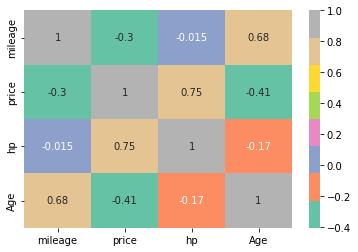

In [451]:
sns.heatmap(df.corr(), annot=True, cmap="Set2")
plt.show()

In [452]:
df.dtypes

mileage        int64
make          object
model         object
fuel          object
gear          object
offerType     object
price          int64
hp           float64
Age            int64
dtype: object

In [453]:
df.offerType.unique()

array(['Used', 'Demonstration', "Employee's car", 'Pre-registered', 'New'],
      dtype=object)

In [454]:
df.offerType.value_counts()

Used              39822
Pre-registered     2768
Demonstration      2351
Employee's car     1117
New                  13
Name: offerType, dtype: int64

In [455]:
#drop 'new'by filtering out value counts below as we have only afew data values
df = df.groupby("offerType").filter(lambda x: len(x) > 50)

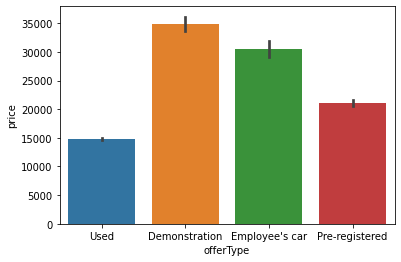

In [456]:
sns.barplot(x="offerType", y="price", data=df)
plt.show()

In [457]:
df.hp.describe()

count    46058.000000
mean       132.969538
std         74.991707
min          1.000000
25%         86.000000
50%        116.000000
75%        150.000000
max        850.000000
Name: hp, dtype: float64

In [458]:
#check for horsepower below 5 and drop
hp_drop = df[df.hp<5]
df.drop(hp_drop.index,inplace=True)

In [459]:
df.fuel.unique()

array(['Diesel', 'Gasoline', 'Electric/Gasoline', '-/- (Fuel)',
       'Electric', 'Electric/Diesel', 'CNG', 'LPG', 'Others', 'Hydrogen',
       'Ethanol'], dtype=object)

In [460]:
#check for fuel with value counts above 50
df = df.groupby("fuel").filter(lambda x: len(x) > 50)

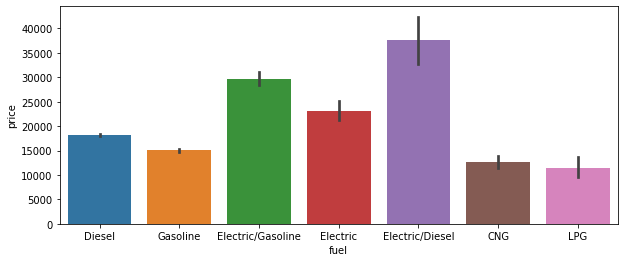

In [461]:
plt.subplots(figsize=(10,4))
sns.barplot(x="fuel", y="price", data=df)
plt.show()

In [462]:
df.gear.unique()

array(['Manual', 'Automatic', 'Semi-automatic'], dtype=object)

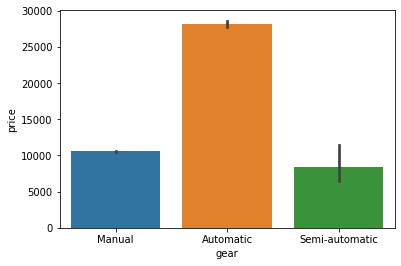

In [463]:
sns.barplot(x="gear", y="price", data=df)
plt.show()

In [464]:
#drop the make and model of car as 
df.drop(labels=['make','model'],axis= 1, inplace = True)

In [465]:
df.head()

,mileage,fuel,gear,offerType,price,hp,Age
0,235000,Diesel,Manual,Used,6800,116.0,11
1,92800,Gasoline,Manual,Used,6877,122.0,11
2,149300,Gasoline,Manual,Used,6900,160.0,11
3,96200,Gasoline,Manual,Used,6950,110.0,11
4,156000,Gasoline,Manual,Used,6950,156.0,11


In [466]:
df = pd.get_dummies(data = df,drop_first=True)

In [467]:
df.head()

,mileage,price,hp,Age,fuel_Diesel,fuel_Electric,fuel_Electric/Diesel,fuel_Electric/Gasoline,fuel_Gasoline,fuel_LPG,gear_Manual,gear_Semi-automatic,offerType_Employee's car,offerType_Pre-registered,offerType_Used
0,235000,6800,116.0,11,1,0,0,0,0,0,1,0,0,0,1
1,92800,6877,122.0,11,0,0,0,0,1,0,1,0,0,0,1
2,149300,6900,160.0,11,0,0,0,0,1,0,1,0,0,0,1
3,96200,6950,110.0,11,0,0,0,0,1,0,1,0,0,0,1
4,156000,6950,156.0,11,0,0,0,0,1,0,1,0,0,0,1


In [468]:
X = df.drop('price',axis=1)

In [469]:
y=df.price

In [470]:
from sklearn.model_selection import train_test_split

In [471]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=2)

In [472]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score

In [478]:
CV = []
R2_train = []
R2_test = []

def car_pred_model(model,model_name):
    # Training model
    model.fit(X_train,y_train)
            
    # R2 score of train set
    y_pred_train = model.predict(X_train)
    R2_train_model = r2_score(y_train,y_pred_train)
    R2_train.append(round(R2_train_model,2))
    
    # R2 score of test set
    y_pred_test = model.predict(X_test)
    R2_test_model = r2_score(y_test,y_pred_test)
    R2_test.append(round(R2_test_model,2))
    
    # R2 mean of train set using Cross validation
    cross_val = cross_val_score(model ,X_train ,y_train ,cv=5)
    cv_mean = cross_val.mean()
    CV.append(round(cv_mean,2))
    
    # Printing results
    print("Train R2-score :",round(R2_train_model,2))
    print("Test R2-score :",round(R2_test_model,2))
    print("Train CV scores :",cross_val)
    print("Train CV mean :",round(cv_mean,2))
    
    # Plotting Graphs 
    # Residual Plot of train data
    fig, ax = plt.subplots(1,2,figsize = (10,4))
    ax[0].set_title('Residual Plot of Train samples')
    sns.distplot((y_train-y_pred_train),hist = False,ax = ax[0])
    ax[0].set_xlabel('y_train - y_pred_train')
    
    # Y_test vs Y_train scatter plot
    ax[1].set_title('y_test vs y_pred_test')
    ax[1].scatter(x = y_test, y = y_pred_test)
    ax[1].set_xlabel('y_test')
    ax[1].set_ylabel('y_pred_test')
    
    plt.show()

Train R2-score : 0.61
Test R2-score : 0.75
Train CV scores : [0.70614632 0.70811344 0.63318925 0.47134037 0.60496222]
Train CV mean : 0.62


C:\Python310\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


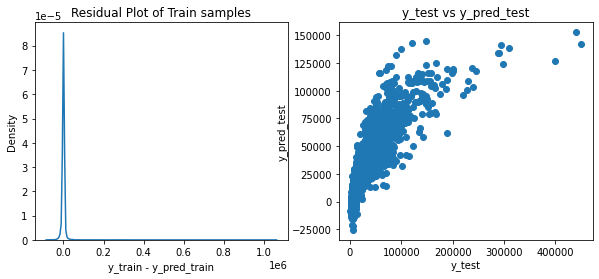

In [479]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
car_pred_model(lr,"Linear_regressor.pkl")

In [383]:
from sklearn.linear_model import LinearRegression

In [385]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [422]:
steps=[('scale',StandardScaler()),  ('polynomial', PolynomialFeatures(include_bias=False)),('model',LinearRegression())]

In [423]:
pipe=Pipeline(steps)
pipe

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [424]:
Z = X.astype(float)

Pipeline(steps=[('scale', StandardScaler()),
                ('polynomial', PolynomialFeatures(include_bias=False)),
                ('model', LinearRegression())])

In [481]:
Z.dtypes

mileage                     float64
hp                          float64
Age                         float64
fuel_Diesel                 float64
fuel_Electric               float64
fuel_Electric/Diesel        float64
fuel_Electric/Gasoline      float64
fuel_Gasoline               float64
fuel_LPG                    float64
gear_Manual                 float64
gear_Semi-automatic         float64
offerType_Employee's car    float64
offerType_Pre-registered    float64
offerType_Used              float64
dtype: object

In [ ]:
#split train and test
Z_train, Z_test, y1_train, y1_test = train_test_split(Z, y, test_size=0.4, random_state=2)
#fit model
pipe.fit(Z_train,y1_train)

In [425]:
ypipe_train=pipe.predict(Z_train)
ypipe_train[0:4]

array([ 9500.81499481,  7243.72950745, 14396.20492935, 64826.3000946 ])

In [426]:
print('The R-square is: ', pipe.score(Z_train, y1_train))

The R-square is:  0.7248156493230135


In [427]:
ypipe_test=pipe.predict(Z_test)
ypipe_test[0:4]

array([ 9246.13947296,  7818.723526  , 12019.78351593, 29361.37171936])

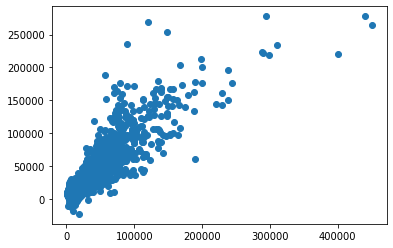

In [428]:
plt.scatter(y1_test,ypipe_test)

In [429]:
print('The R-square is: ', pipe.score(Z_test, y1_test))

The R-square is:  0.8318965865614936


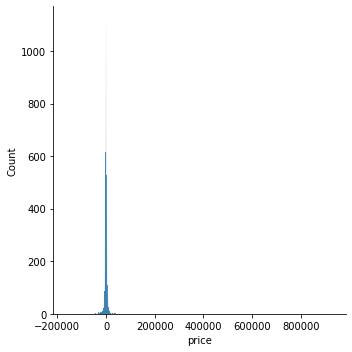

In [480]:
#sns.displot((y1_train-ypipe_train),hist = False)
sns.displot((y1_train-ypipe_train))
plt.show()